In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

path = kagglehub.dataset_download("jillanisofttech/lung-cancer-detection")

print("Path to dataset files:", path)
csv_file=None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break
if csv_file is None:
    print("No CSV file found in the downloaded dataset.")
else:
  print(f"Found CSV file: {csv_file}")
df = pd.read_csv(csv_file)
print(df.head())
print(df.info())
print(df.describe())

Path to dataset files: /root/.cache/kagglehub/datasets/jillanisofttech/lung-cancer-detection/versions/1
Found CSV file: /root/.cache/kagglehub/datasets/jillanisofttech/lung-cancer-detection/versions/1/survey lung cancer.csv
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1       

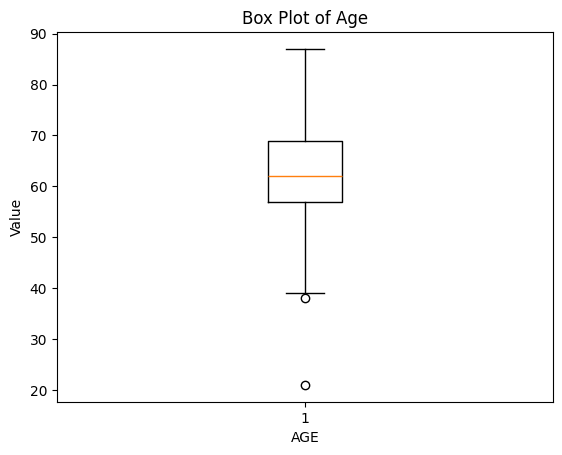

In [ ]:
plt.boxplot(df['AGE'])
plt.xlabel('AGE')
plt.ylabel('Value')
plt.title('Box Plot of Age')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Gender' is the column in your DataFrame 'df'
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])
print("Encoded Gender Column:\n", df['GENDER'].head())

print("Encoded Gender Column:\n", df['LUNG_CANCER'].head())


Encoded Gender Column:
 0    1
1    1
2    0
3    1
4    0
Name: GENDER, dtype: int64
Encoded Gender Column:
 0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv')

# Standardize the entire DataFrame
scaler = MinMaxScaler()
df_normalised= scaler.fit_transform(df)

# Convert the result back to a DataFrame with the original column names
df_normalised = pd.DataFrame(df_normalised, columns=df.columns)

print("Standardized Dataset:\n", df_normalised.head())


Standardized Dataset:
    GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0     1.0  0.727273      0.0             1.0      1.0            0.0   
1     1.0  0.803030      1.0             0.0      0.0            0.0   
2     0.0  0.575758      0.0             0.0      0.0            1.0   
3     1.0  0.636364      1.0             1.0      1.0            0.0   
4     0.0  0.636364      0.0             1.0      0.0            0.0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0              0.0       1.0       0.0       1.0                1.0       1.0   
1              1.0       1.0       1.0       0.0                0.0       0.0   
2              0.0       1.0       0.0       1.0                0.0       1.0   
3              0.0       0.0       0.0       0.0                1.0       0.0   
4              0.0       0.0       0.0       1.0                0.0       1.0   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN

In [ ]:
independent_data_normalised = df_normalised.drop(columns=['LUNG_CANCER'])

# Step 1: Calculate the covariance matrix
covariance_matrix = np.cov(independent_data_normalised, rowvar=False)
#print("Covariance Matrix:\n", covariance_matrix)

# Step 2: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Now you can use the eigenvalues and eigenvectors for PCA.
sorted_eigenvalues=np.sort(eigenvalues)[::-1]
print(sorted_eigenvalues)
print(eigenvectors.shape)



Eigenvalues:
 [0.70846146 0.46694674 0.36625891 0.33071302 0.01454403 0.26388924
 0.07188581 0.08017844 0.22547108 0.20339956 0.10657238 0.18250097
 0.12881327 0.15487817 0.14276959]

Eigenvectors:
 [[-3.28036091e-01 -3.13231425e-01  1.07773077e-01 -2.61969707e-01
   2.87547638e-03 -1.85304544e-01 -1.31019902e-01 -3.12103845e-02
  -6.63404223e-03  2.77912824e-01  4.28496039e-01  2.33359995e-01
  -5.48888958e-01 -1.81434747e-01 -1.09571627e-01]
 [-5.64745400e-03 -5.52779426e-03 -2.48170591e-02  7.47427067e-03
  -9.95882017e-01 -2.03529688e-02 -5.01401599e-02  5.52238503e-02
  -1.47554664e-02 -1.16968844e-02 -1.81421568e-02  1.12046523e-02
   7.02486300e-04 -6.55942129e-03 -2.55756234e-02]
 [ 4.29851851e-02 -5.68236110e-02  2.10091299e-01 -5.56134562e-01
  -1.97954679e-02  3.94811091e-01  1.10297662e-01  4.73628234e-02
   5.03090981e-02 -3.80053573e-01  5.11225659e-02 -4.29139824e-01
  -2.29550193e-01  2.37276198e-01 -1.67580915e-01]
 [ 3.79707350e-01 -1.46355190e-01 -3.03586076e-01 -9.

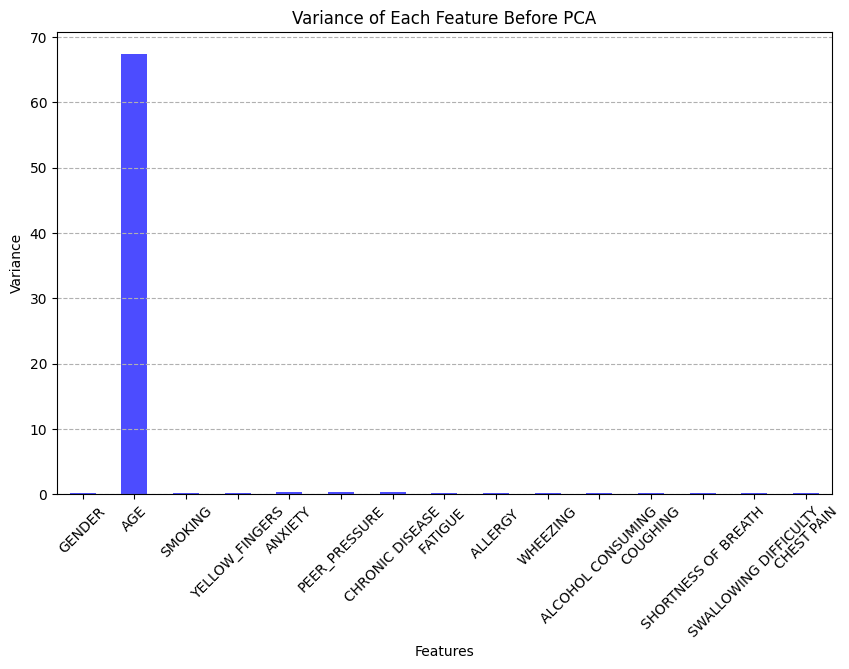

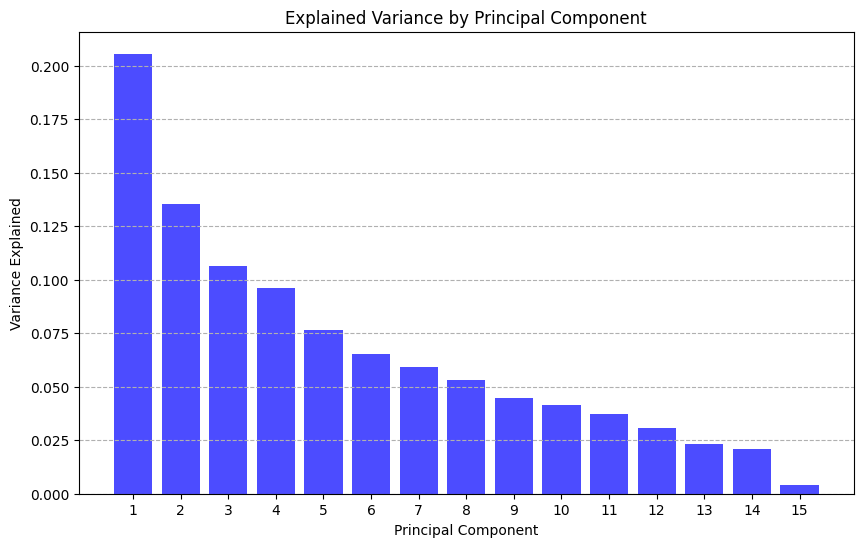

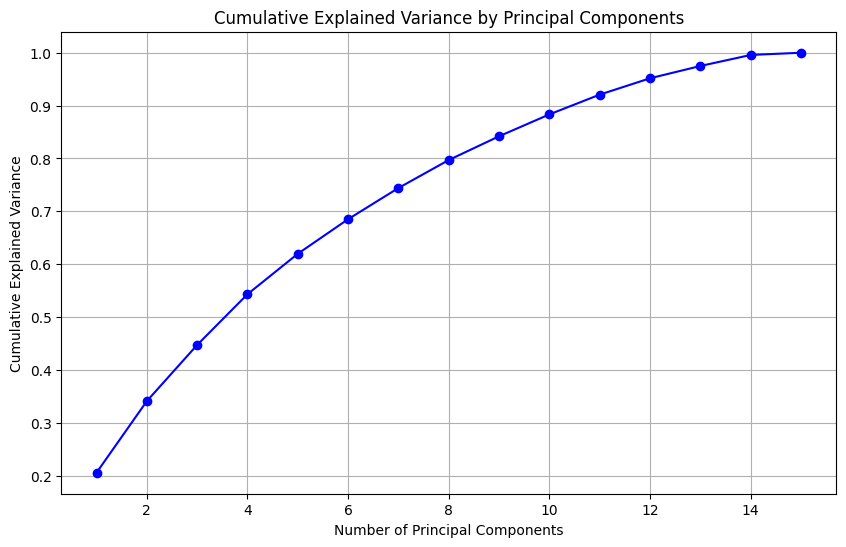

Number of components chosen to explain 95.0% variance: 12


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Step 3: Calculate variance for each feature
independent_data = df.drop(columns=['LUNG_CANCER'])
variance = independent_data.var()

# Step 4: Plot the variance for each feature
plt.figure(figsize=(10, 6))
variance.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Each Feature Before PCA')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()



# Step 2: Compute PCA
pca = PCA()
pca.fit(independent_data_normalised)

# Step 3: Get explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Step 4: Plot the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))  # Set x-ticks to be the component numbers
plt.grid(axis='y', linestyle='--')
plt.show()

# Step 4: Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Step 5: Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Find the number of components required for ~95% variance
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1





print(f"Number of components chosen to explain {threshold*100}% variance: {n_components}")

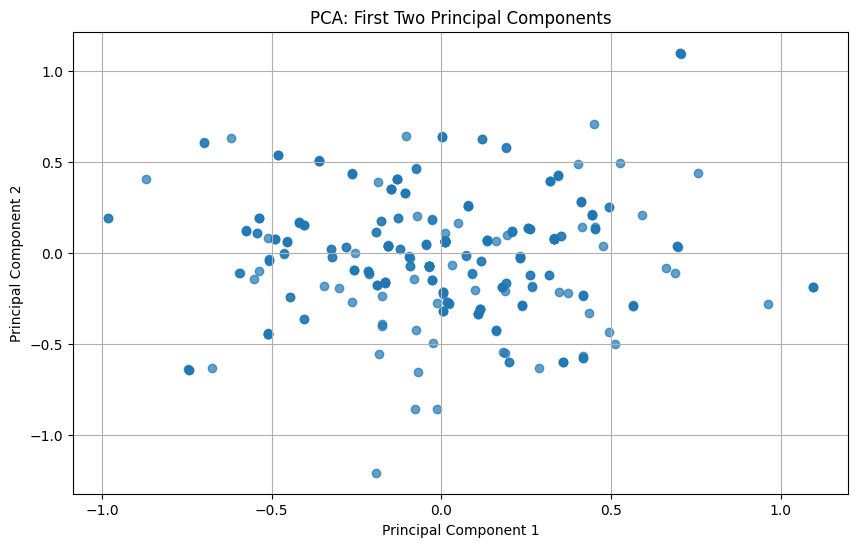

In [ ]:
# Transform data using the selected number of components
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(independent_data_normalised)

plt.figure(figsize=(10, 6))
plt.scatter(data_reduced[:, 10], data_reduced[:, 11], alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y = df['LUNG_CANCER']
# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(independent_data, y, test_size=0.2, random_state=42)

# Step 5: Fit the Logistic Regression model
logistic_model = LogisticRegression(max_iter=500)
# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Output the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")

logistic_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = logistic_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Cross-Validation Scores: [0.88       0.86       0.93877551 0.89795918 0.91836735]
Mean CV Score: 0.90
Accuracy: 0.97
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

